### Data Science Job Salary Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome. Of course: you cannot use other columns related to salary such as min, max, range of salary for prediction. (This is cheating!)  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration


In [1]:
import pandas as pd
import numpy as np
import random as rd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# Read data
df_train = pd.read_csv("jobs_train.csv")
df_test = pd.read_csv('jobs_test.csv')

In [2]:
df_train.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,0,Data Scientist,105-167,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,-1,105,167,136,WA,0,-1,1,0,0,0,0,0,0,data scientist,na
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),124,198,161,IA,1,28,0,1,0,0,0,1,0,analyst,na
2,2,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,-1,-1,$10+ billion (USD),91,150,120,NY,0,57,1,0,0,0,1,1,0,data scientist,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),69,116,92,CA,0,38,1,1,1,1,1,0,1,data scientist,senior
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,1,39,1,1,0,0,1,0,0,data scientist,na
5,5,"Data Scientist, Kinship - NYC/Portland",92-155,Back to search results\nPrevious job\n\nNext j...,3.9,Mars,"New York, NY","Mc Lean, VA",10000+ employees,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),92,155,123,NY,0,109,1,0,0,1,0,0,0,data scientist,na
6,6,Data Scientist,124-198,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,Consulting,Business Services,$1 to $5 million (USD),124,198,161,DC,0,-1,1,0,0,0,0,1,0,data scientist,na
7,7,Software Engineer - Machine Learning & Data Sc...,128-201,Please note that visa sponsorship is not avail...,4.7,New Relic,"Portland, OR","San Francisco, CA",1001 to 5000 employees,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),128,201,164,OR,0,12,1,0,0,0,0,0,0,mle,na
8,8,Analytics - Business Assurance Data Analyst,145-225,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),145,225,185,IA,1,28,0,1,0,0,0,1,0,analyst,na
9,9,Data Engineer - Kafka,31-56,Western Digital®\n\nThe next big thing in\ndat...,3.5,Western Digital,"San Jose, CA","San Jose, CA",10000+ employees,Company - Public,Computer Hardware & Software,Information Technology,$10+ billion (USD),31,56,43,CA,1,50,1,0,1,1,1,0,0,data engineer,na


Unknown values are not standardized. For example, -1 in Headquarters, Size, etc. and na in seniority

In [3]:
for column in df_train.columns:
    print(column, df_train[column].nunique())

Unnamed: 0 530
Job Title 145
Salary Estimate 30
Job Description 408
Rating 31
Company Name 362
Location 181
Headquarters 201
Size 9
Type of ownership 13
Industry 54
Sector 23
Revenue 14
min_salary 26
max_salary 26
avg_salary 25
job_state 39
same_state 2
company_age 95
python 2
excel 2
hadoop 2
spark 2
aws 2
tableau 2
big_data 2
job_simp 7
seniority 2


Checking the first 10 rows and number of unique values in each column, we already can see what columns we may drop. Unnamed: 0 is just the indices, Job title is probably has many different values meaning that it is inappropriate for classification, as well as job descriptionl, headquarters, company name, location. Also, we should drop salary related columns. 

In [4]:
print(df_train.shape, df_test.shape, sep='\n')

(530, 28)
(130, 28)


In [5]:
print(df_train.describe())

       Unnamed: 0      Rating  min_salary  max_salary  avg_salary  same_state  \
count  530.000000  530.000000  530.000000  530.000000  530.000000  530.000000   
mean   264.500000    3.566981   99.260377  148.979245  123.932075    0.396226   
std    153.142091    1.201631   35.004403   50.723513   41.975048    0.489575   
min      0.000000    0.000000   31.000000   56.000000   43.000000    0.000000   
25%    132.250000    3.300000   79.000000  119.000000  103.000000    0.000000   
50%    264.500000    3.800000   92.000000  133.000000  114.000000    0.000000   
75%    396.750000    4.275000  122.000000  163.000000  136.000000    1.000000   
max    529.000000    5.000000  212.000000  331.000000  271.000000    1.000000   

       company_age      python       excel      hadoop       spark  \
count   530.000000  530.000000  530.000000  530.000000  530.000000   
mean     28.967925    0.732075    0.437736    0.216981    0.281132   
std      38.217131    0.443296    0.496577    0.412579    0.

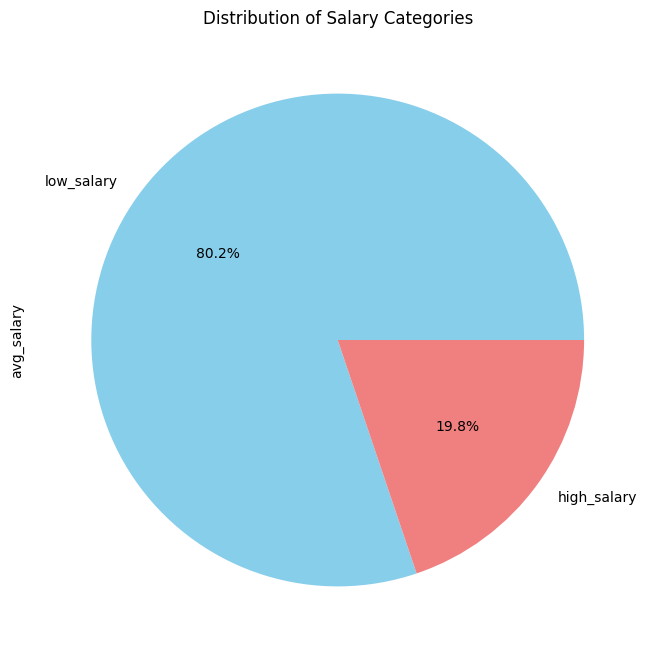

In [6]:
# Creating a pie chart to visualize the distribution of salary categories
plt.figure(figsize=(8, 8))
df_train['avg_salary'].apply(lambda x: 'high_salary' if x > 150 else 'low_salary').value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Salary Categories')
plt.show()


The dataset appears to be heavily unbalanced. We need to focus on recall when training models. And drop as less rows as possible not to remove some of the high_salary instances.

In [7]:
# Converting unknown values into nulls to count the number of them in each column
df_train.replace([-1, "-1", "Unknown", "Unknown / Non-Applicable", "na", "US"], None, inplace=True)
df_train["Rating"].replace(0.0, None, inplace=True)
for column in df_train.columns:
    print(column, '- number of missing values:', df_train[column].isnull().sum())


Unnamed: 0 - number of missing values: 0
Job Title - number of missing values: 0
Salary Estimate - number of missing values: 0
Job Description - number of missing values: 0
Rating - number of missing values: 42
Company Name - number of missing values: 0
Location - number of missing values: 0
Headquarters - number of missing values: 24
Size - number of missing values: 34
Type of ownership - number of missing values: 24
Industry - number of missing values: 56
Sector - number of missing values: 56
Revenue - number of missing values: 187
min_salary - number of missing values: 0
max_salary - number of missing values: 0
avg_salary - number of missing values: 0
job_state - number of missing values: 11
same_state - number of missing values: 0
company_age - number of missing values: 101
python - number of missing values: 0
excel - number of missing values: 0
hadoop - number of missing values: 0
spark - number of missing values: 0
aws - number of missing values: 0
tableau - number of missing val

In [8]:
# Data preprocessing
def preprocessing(df):
    # Drop and add some columns
    def drop_columns(df):
        # We do not need indices
        df = df.reset_index(drop=True)

        # Dropping too unique columns to be useful and salary related columns:
        columns_to_drop = ["Unnamed: 0", "Job Description", "Company Name", "Job Title", "Location", "Headquarters", "Salary Estimate", "min_salary", "max_salary", 'seniority'] 
        # Dropping seniority because there too many rows with missing data, more than 80%

        df = df.drop(columns=columns_to_drop)

        # Add the target column
        df["high_salary"] = df["avg_salary"].apply(lambda x: 1 if x >= 150 else 0)
        return df

    # Change all unknown values into null
    def nulls(df):
        df.replace([-1, "-1", "Unknown", "Unknown / Non-Applicable", "na", "US"], None, inplace=True)
        df["Rating"].replace(0.0, None, inplace=True)

        return df
    
    # I decided to replace missing values in a column with random choice from the column to avoid imputing mean, mode, median bias. 

    # Exploring the data, I concluded that I won't randomly assign values to job_simp, 
    # because they are not actually missing, but just couldn't fit into existing groups.
    # Moreover, assigning random values to probably important column is ineffective. 

    # For job_state column, I decided to drop 11 rows with missing valuse because it is inappropriate for this column to randomly choose a value to replace with.
    # 11 rows won't affect much the model

    # Highly likely, revenue plays crucial role in the predicting salaries, so it is better to fill in the missing value of this column not randomly. 
    # I decided to build a quick classifier to predict the missing values using some of the categorical features that might define the revenue. 
    # The model scores about 0.70 of accuracy which I consider pretty good taking into account that there are 11 different values for revenue. 
    def handling_missing_data(df):
        df['job_simp'].fillna( 'Other', inplace=True) 

        df.dropna(subset='job_state', inplace=True)
        df = df.reset_index(drop=True)
        data = df[['Size', 'Revenue', 'Sector', 'Rating']]

        # One hot encoding of categorical variables 
        data = OneHot(data, ['Size', 'Sector', 'Rating'])

        # Separate data with null and non-null values in revenue
        missing_indices = data[data['Revenue'].isnull()].index
        x_missing = data[data['Revenue'].isnull()].drop('Revenue', axis=1)
        x_existing = data.dropna(subset=['Revenue']).drop('Revenue', axis=1)
        Revenue_existing = data.dropna(subset=['Revenue'])['Revenue']

        # Build the model and make predictions 
        x_train, x_test, Revenue_train, Revenue_test = train_test_split(x_existing, Revenue_existing, test_size=0.3, random_state=42)

        model = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=100)
        model.fit(x_train, Revenue_train)

        predicted_revenue = model.predict(x_test)

        # Evaluate the model
        acc = accuracy_score(Revenue_test, predicted_revenue)

        print("Accuracy:", acc)

        predicted_revenue_missing = model.predict(x_missing)

        # Replacing null values in the original dataset 
        df.loc[missing_indices, 'Revenue'] = predicted_revenue_missing

        # Replacing with random variables from the column
        for column in df.columns:
            non_nulls = df[column].dropna()
            if non_nulls.empty:
                continue  # Skip if there are no non-null values in the column
            for i, row in enumerate(df[column]):
                if pd.isnull(row):
                    random_value = rd.choice(non_nulls.to_list())
                    df.at[i, column] = random_value
                    
        return df
    

    # There are only two column that might have outliers - rating and company age.
    # However, if there is any outlier in company age, that highly likely means that it is natural outlier that I should remove. Therofore, I will remove outliers only from rating column
    def handling_outliers(df):

        # Calculating Q1, Q3, and IQR
        Q1 = df['Rating'].quantile(0.25)
        Q3 = df['Rating'].quantile(0.75)
        IQR = Q3 - Q1

        # Defining the lower and upper bounds
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

        df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

        return df
    

    return handling_outliers(handling_missing_data(nulls(drop_columns(df))))

def OneHot(df, cat_vars):

    data = df[cat_vars]

    df = df.reset_index(drop=True)

    encoder = OneHotEncoder(handle_unknown='ignore')
    x = encoder.fit_transform(data)
    x = pd.DataFrame.sparse.from_spmatrix(x)
    x.columns = encoder.get_feature_names_out()
    return pd.concat([x, df.drop(cat_vars, axis=1)], axis=1)

# I'm preprocessing them together to make them of the same format which will be needed in the future for models.
# To keep the same rows in the test and train datasets, I'm adding 'train' column to split them after preprocessing
df_test['train'] = False
df_train['train'] = True 
df = preprocessing(pd.concat([df_train, df_test], axis = 0))

car_vars = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'job_simp']
x = df.drop('high_salary', axis=1)



Accuracy: 0.7301587301587301


### Module 2: Data Visualization


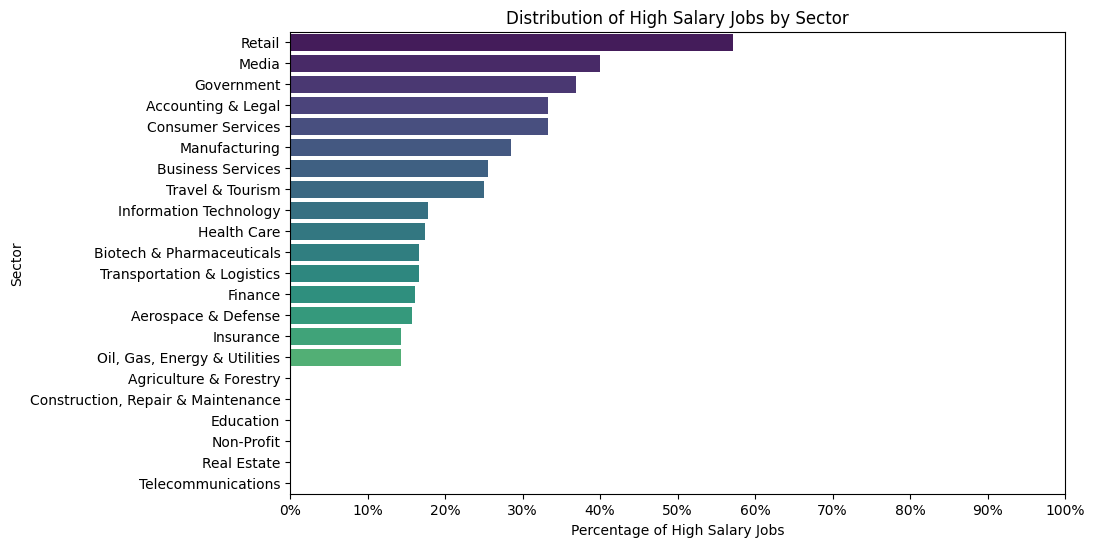

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Counting the number of jobs for each sector
job_counts = df.groupby('Sector').size().sort_values(ascending=False)

# Counting the number of high salary jobs for each sector
high_salary_counts = df[df['high_salary'] == 1].groupby('Sector').size().sort_values(ascending=False)

# Calculating percentages relative to the count of jobs in each sector
percentage_high_salary = (high_salary_counts / job_counts) * 100

# Sorting sectors based on the percentage of high salary jobs
percentage_high_salary = percentage_high_salary.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_high_salary.values, y=percentage_high_salary.index, palette=sns.color_palette('viridis', len(percentage_high_salary)))

plt.xlabel('Percentage of High Salary Jobs')
plt.ylabel('Sector')
plt.title('Distribution of High Salary Jobs by Sector')
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ytick_labels = [f'{i}%' for i in range(0, 101, 10)]
plt.xticks(yticks, ytick_labels)
plt.show()


This chart illustrates salary variations across sectors. Consumer services, media, and retail stand out with the highest share of high-paying jobs, while Agriculture & forestry, construction, education, non-profit, real estate, and telecommunication show no high-paid positions. Thus, the sector column might help in predicting the salaries.

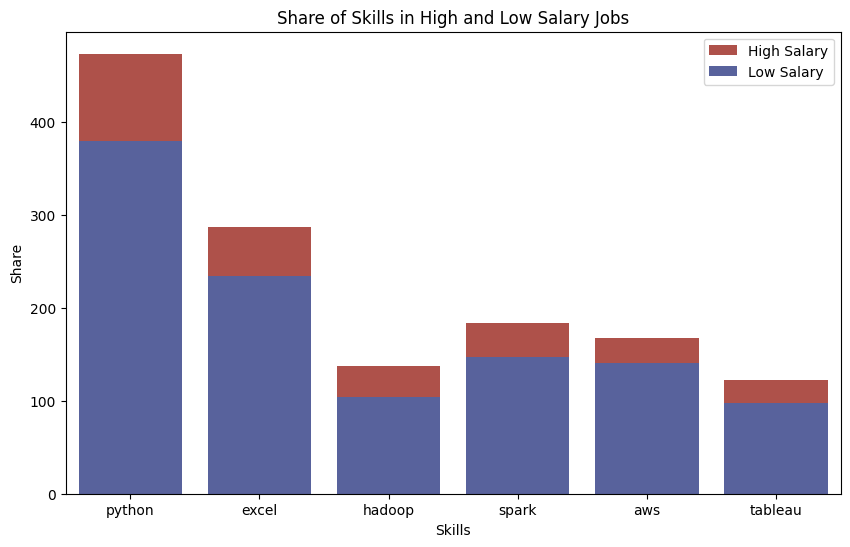

python     0.198732
excel      0.184669
hadoop     0.240876
spark      0.201087
aws        0.155689
tableau    0.204918
dtype: float64


In [10]:

# Assuming you have a DataFrame df with columns: python, excel, hadoop, spark, aws, high_salary
# where high_salary is 1 for high-paid jobs and 0 for low-paid jobs

# Group by high_salary and calculate the mean for each skill
skill_share = df.groupby('high_salary')[['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau']].sum()

# Transpose the DataFrame for better plotting
skill_share = skill_share.transpose()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_share.index, y=skill_share[1]+skill_share[0], color='#bf4239', label='High Salary')
sns.barplot(x=skill_share.index, y=skill_share[0], color='#4c5aa8', label='Low Salary')

plt.xlabel('Skills')
plt.ylabel('Share')
plt.title('Share of Skills in High and Low Salary Jobs')
plt.legend()

plt.show()
print(skill_share[1]/(skill_share[1]+skill_share[0]))


The chart illustrates the popularity of specific tools in the job market and their correlation with high-paid job shares. As observed, Python and Excel are the most common skills, contributing to a moderate share of high-paid jobs. Conversely, Hadoop, although less common, boasts the highest share of high-paid jobs. The disparity in high salary shares between Hadoop and AWS is substantial, standing at 10%, which is quite significant.

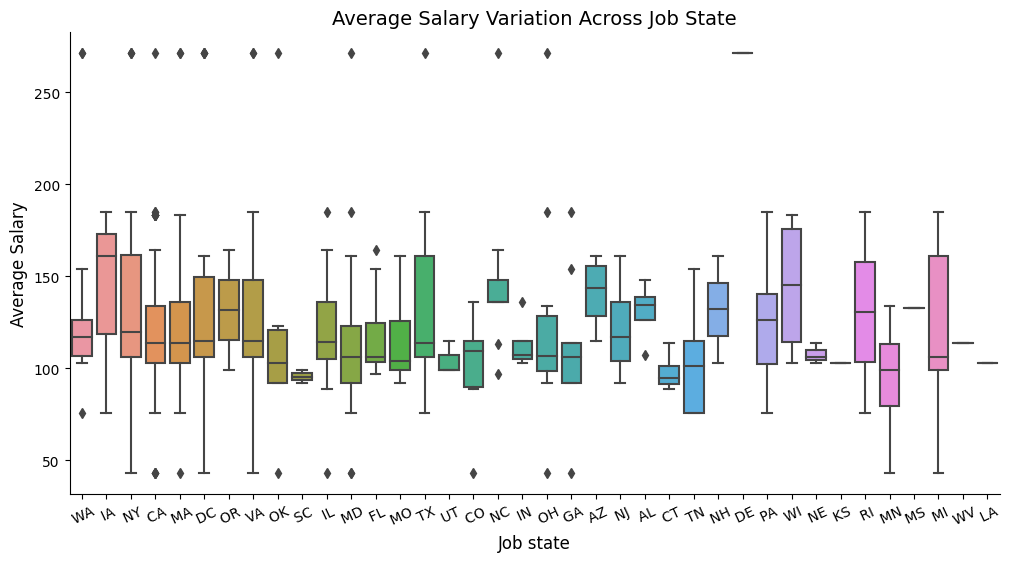

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(y=df.avg_salary, x=df['job_state'])

plt.xticks(rotation=25)
plt.xlabel('Job state', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.title('Average Salary Variation Across Job State', fontsize=14)
sns.despine()

plt.show()

Interestingly, salaries exhibit significant variation across different states. The highest mean exceeds 150 being in the Iowa state, while the lowest mean falls below 100 being in South Carolina and Connecticut. Additionally, the candles' long wicks suggest considerable salary range within each state. Such difference in salaries between states means that the column is important and might contribute to predicting the salary group. 

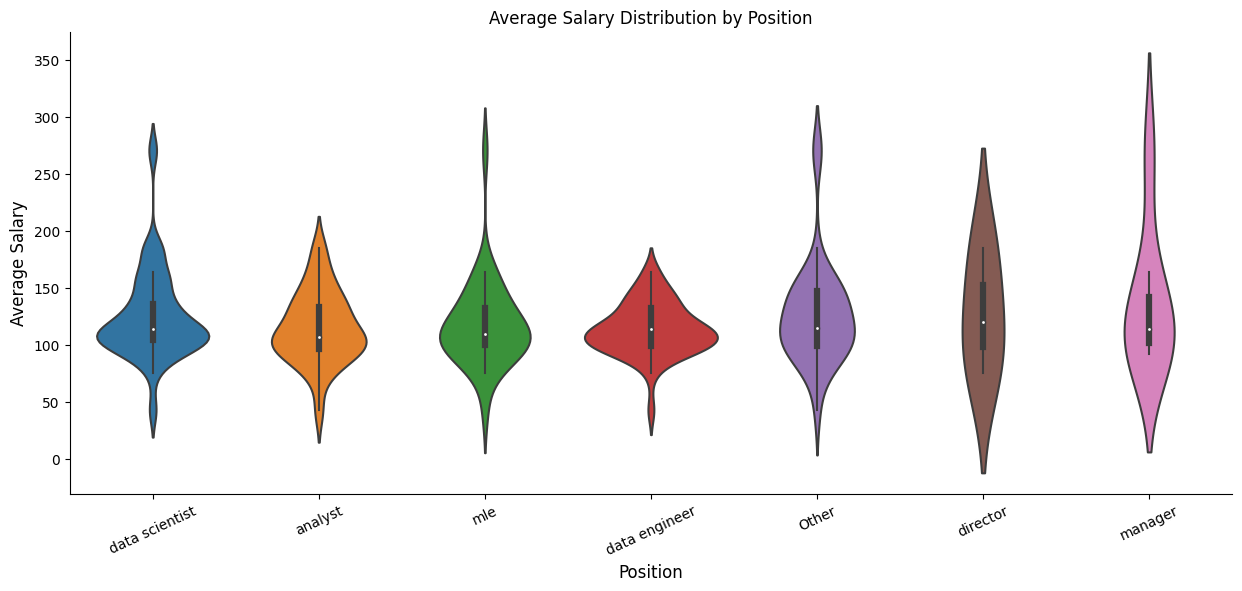

In [12]:

plt.figure(figsize=(15, 6))

sns.violinplot(x=df.job_simp, y=df.avg_salary.astype(int))

plt.xticks(rotation=25)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.title('Average Salary Distribution by Position')
sns.despine()

plt.show()

From this chart we can see that salaries range the least at data engineer with the range of about 120, with mostly crowded at 100, while salaries of managers range greately with range close to 300. Overall, the average salaries distribution by position differ, meaning that the column might be important. 

### Module 3: Dimension Reduction


I will use PCA to reduce the dimension and try to find the optimal number of components to retain the most of the information.

/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is d

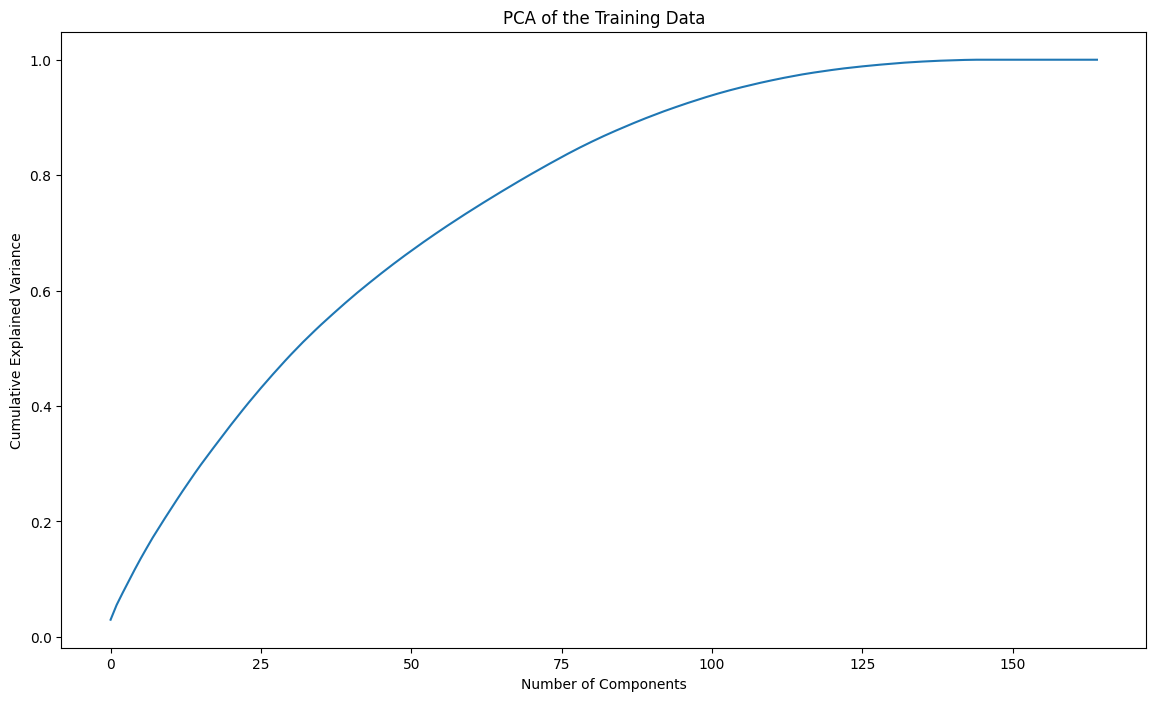

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Converting categorical data to be able to apply pca. Note that I'm converting combined datasets of train and test to keep them in the same format.
# After encoding, I separate them back as they were. 
x = OneHot(x, car_vars)
x_train = x[x['train']==True].drop('train', axis=1)
x_test = x[x['train']==False].drop('train', axis=1)
y_train = df[df['train']==True]['high_salary']
y_test =df[df['train']==False]['high_salary']

# Standardizing the data to get it ready for PCA
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1, 1))
x_train = x_scaler.transform(x_train)
y_train = y_scaler.transform(y_train.values.reshape(-1, 1))

# pca
pca = PCA(n_components=len(x_train[0])).fit(x_train)

# Ploting cumulative explained variance for pca. This plot helps us to understand the retained information while reducing the dimension of the dataset.
# 95% of the variance explained by 100 components. To keep a fair amount of information, I need 100 components. 
x_train = pca.transform(x_train)
explained_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA of the Training Data')
plt.show()



### Module 4: Classification and Prediction
 

In [14]:
# Preparation for building models 
from sklearn.preprocessing import LabelEncoder
# Formatting x_test and y_test as x_train and y_train
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))
x_test = pca.transform(x_test)

# Reducing the dimenstion down to 100 and keeping the most of the information
x_train = x_train[:, :100]
x_test = x_test[:, :100]

y_train = y_train.reshape(len(y_train))
y_test = y_test.reshape(len(y_test))

# Convert y values to 0 and 1
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
<__array_function__ internals>:200: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`


For this task, I chose support vector machine, random forest, gradient boosting classifiers.

### Random forest classifier 

Best Parameters: {'max_depth': 10, 'n_estimators': 20}
Training Scores:
                                   params  mean_test_recall  \
0   {'max_depth': 10, 'n_estimators': 20}          0.201522   
1   {'max_depth': 10, 'n_estimators': 80}          0.154166   
2  {'max_depth': 10, 'n_estimators': 150}          0.137483   
3   {'max_depth': 20, 'n_estimators': 20}          0.128681   
4   {'max_depth': 20, 'n_estimators': 80}          0.134147   
5  {'max_depth': 20, 'n_estimators': 150}          0.155454   
6   {'max_depth': 50, 'n_estimators': 20}          0.128681   
7   {'max_depth': 50, 'n_estimators': 80}          0.134147   
8  {'max_depth': 50, 'n_estimators': 150}          0.155454   

   mean_test_accuracy  mean_test_precision  
0            0.813088             0.611111  
1            0.809242             0.647778  
2            0.811184             0.590000  
3            0.801512             0.541429  
4            0.805377             0.640000  
5            0.815049      

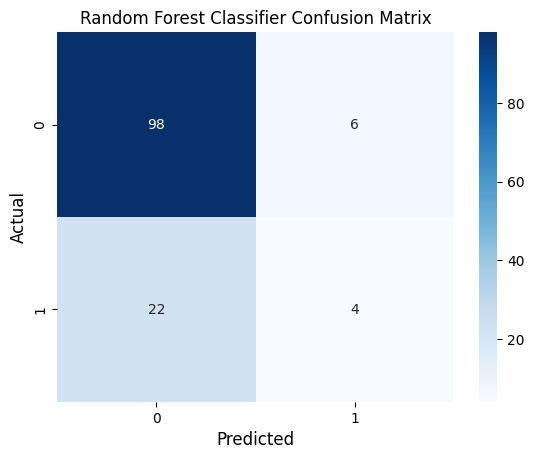

Random Forest results:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       104
           1       0.40      0.15      0.22        26

    accuracy                           0.78       130
   macro avg       0.61      0.55      0.55       130
weighted avg       0.73      0.78      0.74       130



In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the random forest classifier
classifier = RandomForestClassifier(random_state=42)

# Defining hyperparameters for grid search
param_grid = {
    'n_estimators': [20, 80, 150],
    'max_depth': [10, 20, 50],
}

# Defining scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1',
}

# Defining k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation to find the best parameters for the classifier
grid_search = GridSearchCV(classifier, param_grid, cv=kf, scoring=scoring_metrics, refit='recall')
grid_search.fit(x_train, y_train)

# Displaying best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Displaying training scores for each combination of hyperparameters
results_df = pd.DataFrame(grid_search.cv_results_)
print("Training Scores:")
print(results_df[['params','mean_test_recall', 'mean_test_accuracy', 'mean_test_precision']])

# Prediction
y_pred = grid_search.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Classification report for the classifier
print("Random Forest results:")
print(classification_report(y_test, y_pred))



### Gradient boosting classifier

Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Training Scores:
                                               params  mean_test_recall  \
0   {'learning_rate': 0.5, 'max_depth': 5, 'n_esti...          0.304613   
1   {'learning_rate': 0.5, 'max_depth': 5, 'n_esti...          0.277119   
2   {'learning_rate': 0.5, 'max_depth': 7, 'n_esti...          0.241876   
3   {'learning_rate': 0.5, 'max_depth': 7, 'n_esti...          0.231170   
4   {'learning_rate': 0.5, 'max_depth': 10, 'n_est...          0.406274   
5   {'learning_rate': 0.5, 'max_depth': 10, 'n_est...          0.415338   
6   {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...          0.245934   
7   {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...          0.255458   
8   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...          0.260450   
9   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...          0.345179   
10  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...          0.345073   
11  {'l

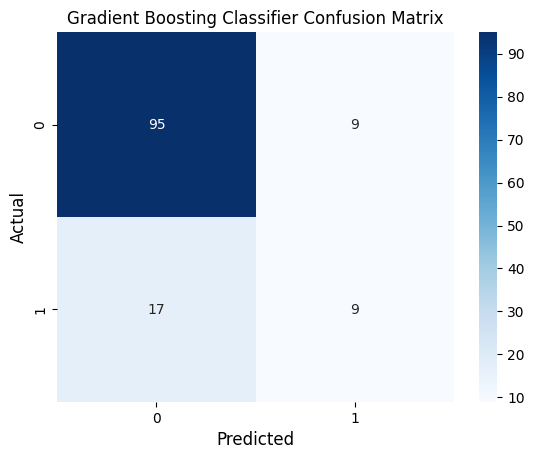

Gradient boosting results:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       104
           1       0.50      0.35      0.41        26

    accuracy                           0.80       130
   macro avg       0.67      0.63      0.64       130
weighted avg       0.78      0.80      0.79       130



In [19]:
# Defining gradient boosting classifier
classifier = GradientBoostingClassifier()

# hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [ 5, 7, 10],
    'learning_rate': [ 0.5, 0.1],
}

# grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=kf, scoring=scoring_metrics, refit='accuracy')
grid_search.fit(x_train, y_train)

# Displaying best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Displaying training scores for each combination of hyperparameters
results_df = pd.DataFrame(grid_search.cv_results_)
print("Training Scores:")
print(results_df[['params','mean_test_recall', 'mean_test_accuracy', 'mean_test_precision']])

# Prediction
y_pred = grid_search.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Classification report for the classifier
print("Gradient boosting results:")
print(classification_report(y_test, y_pred))





### Support vector machine

/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/talgatbaktybekov/miniconda3/lib/python3.9/site-pack

SVM results:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Training Accuracy: 0.8009623759548796


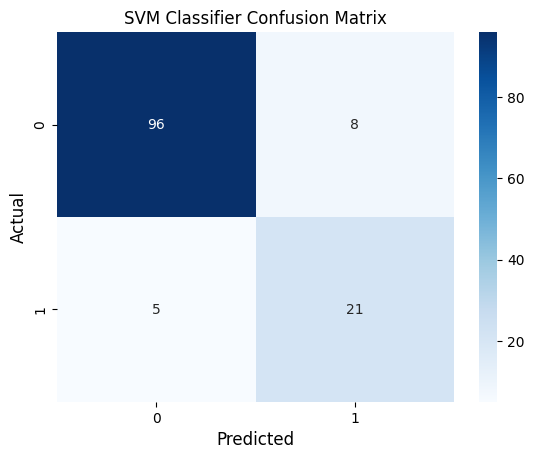

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       104
           1       0.72      0.81      0.76        26

    accuracy                           0.90       130
   macro avg       0.84      0.87      0.85       130
weighted avg       0.91      0.90      0.90       130

Training Scores:
                           params  mean_test_recall  mean_test_accuracy  \
0  {'C': 0.1, 'kernel': 'linear'}          0.750979            0.930695   
1     {'C': 0.1, 'kernel': 'rbf'}          0.000000            0.801531   
2    {'C': 0.1, 'kernel': 'poly'}          0.000000            0.793801   
3    {'C': 1, 'kernel': 'linear'}          0.800962            0.928715   
4       {'C': 1, 'kernel': 'rbf'}          0.117975            0.805396   
5      {'C': 1, 'kernel': 'poly'}          0.009524            0.786109   
6   {'C': 10, 'kernel': 'linear'}          0.765494            0.920986   
7      {'C': 10, 'kernel': 'rbf'}          0.496754     

In [20]:

# Defining the SVM
classifier = SVC(probability=True)

# hyperparameters for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Grid search with cross validation
grid_search = GridSearchCV(classifier, param_grid, cv=kf, scoring=scoring_metrics, refit='recall')
grid_search.fit(x_train, y_train)

# Displaying best parameters and training scores
print("SVM results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# Prediction
y_pred = grid_search.predict(x_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Classifier Confusion Matrix")
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Classification report for the classifier
print(classification_report(y_test, y_pred))

# Displaying training scores for each combination of hyperparameters
results_df = pd.DataFrame(grid_search.cv_results_)
print("Training Scores:")
print(results_df[['params','mean_test_recall', 'mean_test_accuracy', 'mean_test_precision']])




In [18]:
x_test 

array([[ 3.07918313, -1.75514765, -2.89907787, ..., -0.35025597,
         0.09290688, -0.03530951],
       [-0.99476979,  1.59361542,  0.64884799, ..., -0.20725966,
        -0.33636493, -0.10938999],
       [-2.23660493,  0.20409001, -0.4322418 , ..., -0.05452943,
         0.10622141,  1.79050643],
       ...,
       [ 4.06088108,  3.16160158,  0.21496367, ..., -0.33194638,
         0.80719111, -0.40584232],
       [-1.54797798,  0.73061825,  0.55029628, ...,  0.67558925,
        -0.16627245, -0.36715525],
       [-1.98251972,  1.09424833, -0.7939234 , ...,  1.37497817,
         0.33655757, -0.48917363]])

Analyzing the results, it is evident that all models perform well in correctly predicting low salaries. However, the true value of a model lies in its ability to accurately predict high-paid jobs, making recall and precision scores of crucial metrics. <br>

The Random Forest model performed the least effectively with a recall of 0.15 and the best parameters identified as 'max_depth': 10 and 'n_estimators: 20. Grid search scores indicate that the model was not overfitted but struggled to derive correlations between features and the target column. Furthermore, the precision score was low at 0.40 (6 false positives out of 10 positives), indicating the model established false relationships between the target value and features. <br>

In the second position is the Gradient Boosting Classifier, proficient in predicting low-paid jobs but correctly identifying 0.35 of the high-paid jobs. The winning parameters for this model were 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50. Grid search scores reveal that the model was not overfitted, capturing some relations between features and the target column. The precision score was about 0.5, signifying an equal number of correct and incorrect predictions of highly-paid jobs. <br>

The best model among the three was the Support Vector Machine (SVM), demonstrating decent quality with a recall of 0.81, precision of 0.72, and accuracy of 0.95. This model outperformed the others, successfully capturing correlations between features and the target column. The best hyperparameters for this model were 'C': 1, 'kernel': 'linear'. Grid search scores indicate a slight dip in training performance but an improvement in the test, highlighting the model's robustness and generalization capability. <br>

# Module 5: Summary



The dataset presented several challenges, marked by a considerable amount of missing values and imbalanced data. Despite this, discernible patterns emerged, suggesting a correlation between certain variables and salary groups. Distributions of different variables within salary groups differed significantly, reinforcing the idea of a relationship between these columns and the target variable. <br>

An interesting approach was taken to address missing values in the job_simp column by creating a new category for non-grouped values. This nuanced handling provided valuable insights, as these values were not truly missing but rather unclassified.

<br>
A strategic decision was made to employ a preliminary model for predicting missing values in the Revenue column, demonstrating a commitment to robustness over random assignments from the same column
<br>

Among the models considered, SVM stood out as the most effective. With simplistic hyperparameters (C=1, linear kernel), SVM excelled in handling imbalanced data and numerous features. This choice proved advantageous, showcasing SVM's superiority in addressing the inherent challenges of the dataset.